In [3]:
import pandas as pd

In [ ]:
data = pd.read_csv('CC GENERAL.csv')

In [5]:
for i in data: print(i)

CUST_ID
BALANCE
BALANCE_FREQUENCY
PURCHASES
ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES
CASH_ADVANCE
PURCHASES_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY
PURCHASES_INSTALLMENTS_FREQUENCY
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX
PURCHASES_TRX
CREDIT_LIMIT
PAYMENTS
MINIMUM_PAYMENTS
PRC_FULL_PAYMENT
TENURE


Report:

First the missing value is handled using SimpleImputer of sklearn. Different imputater are used based on the characteristic of each column. 
Then the outliers are detected using z-score (equal to 3).
Robust and MinMax scalers are then used to scaled the columns. 

In [6]:
df = data.copy()

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats


# missing value
imputer_median = SimpleImputer(strategy='median')
imputer_mean = SimpleImputer(strategy='mean')
imputer_mode = SimpleImputer(strategy='most_frequent')


df['BALANCE'] = imputer_median.fit_transform(df[['BALANCE']])
df['BALANCE_FREQUENCY'] = imputer_mean.fit_transform(df[['BALANCE_FREQUENCY']])
df['PURCHASES'] = imputer_median.fit_transform(df[['PURCHASES']])
df['ONEOFF_PURCHASES'] = imputer_median.fit_transform(df[['ONEOFF_PURCHASES']])
df['INSTALLMENTS_PURCHASES'] = imputer_median.fit_transform(df[['INSTALLMENTS_PURCHASES']])
df['CASH_ADVANCE'] = imputer_median.fit_transform(df[['CASH_ADVANCE']])
df['PURCHASES_FREQUENCY'] = imputer_mean.fit_transform(df[['PURCHASES_FREQUENCY']])
df['ONEOFF_PURCHASES_FREQUENCY'] = imputer_mean.fit_transform(df[['ONEOFF_PURCHASES_FREQUENCY']])
df['PURCHASES_INSTALLMENTS_FREQUENCY'] = imputer_mean.fit_transform(df[['PURCHASES_INSTALLMENTS_FREQUENCY']])
df['CASH_ADVANCE_FREQUENCY'] = imputer_mean.fit_transform(df[['CASH_ADVANCE_FREQUENCY']])
df['CASH_ADVANCE_TRX'] = imputer_median.fit_transform(df[['CASH_ADVANCE_TRX']])
df['PURCHASES_TRX'] = imputer_median.fit_transform(df[['PURCHASES_TRX']])
df['CREDIT_LIMIT'] = imputer_median.fit_transform(df[['CREDIT_LIMIT']])
df['PAYMENTS'] = imputer_median.fit_transform(df[['PAYMENTS']])
df['MINIMUM_PAYMENTS'] = imputer_median.fit_transform(df[['MINIMUM_PAYMENTS']])
df['PRC_FULL_PAYMENT'] = imputer_mean.fit_transform(df[['PRC_FULL_PAYMENT']])
df['TENURE'] = imputer_mode.fit_transform(df[['TENURE']])

# hancle outliers iwth z-score
z_thresh = 3
continuous_columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                      'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
for col in continuous_columns:
    df = df[(np.abs(stats.zscore(df[col])) < z_thresh)]

# scaling
scaler_robust = RobustScaler()
scaler_minmax = MinMaxScaler()


robust_columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                  'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
df[robust_columns] = scaler_robust.fit_transform(df[robust_columns])


minmax_columns = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                  'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE']
df[minmax_columns] = scaler_minmax.fit_transform(df[minmax_columns])

# save 
df.to_csv('preprocessed_credit_card_data.csv', index=False)

print("Preprocessing completed and saved as 'preprocessed_credit_card_data.csv'")

Preprocessing completed and saved as 'preprocessed_credit_card_data.csv'


In [9]:
df = pd.read_csv('preprocessed_credit_card_data.csv')

In [11]:
df = df.drop(columns= 'CUST_ID')

Report:
first we scale the data and Apply pca and t-sne to reduce the demention.
We plot Elbow method to find out the proper number of clusters (4 is chosen).
Lastly results of each clustering algorithm are visualized and evaluated. 

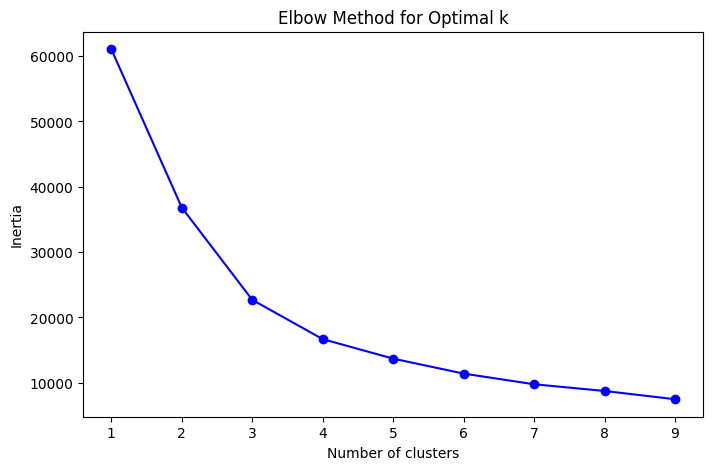

Silhouette Score for K-Means: 0.39
Silhouette Score for DBSCAN: 0.41
Silhouette Score for Hierarchical Clustering: 0.34


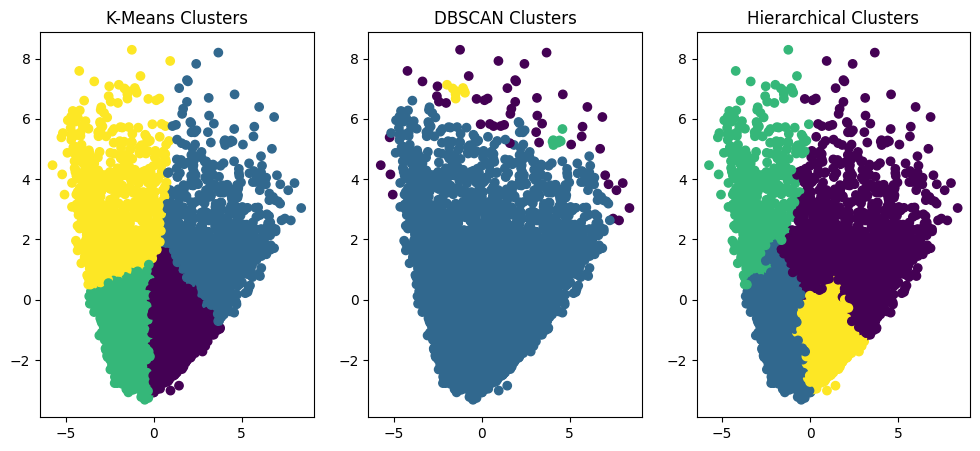

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# standarding
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# pca
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

#t-SNE 
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

# elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)  
    inertia.append(kmeans.inertia_)

# plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# clustering

#K-Means 
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data) 

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  
dbscan_labels = dbscan.fit_predict(pca_data)  

# Hierarchical 
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(pca_data) 

# Silhouette Score
kmeans_silhouette = silhouette_score(pca_data, kmeans_labels)
dbscan_silhouette = silhouette_score(pca_data, dbscan_labels)
hierarchical_silhouette = silhouette_score(pca_data, hierarchical_labels)

print(f'Silhouette Score for K-Means: {kmeans_silhouette:.2f}')
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette:.2f}')
print(f'Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette:.2f}')

# visualizing
plt.figure(figsize=(12, 5))


plt.subplot(1, 3, 1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('K-Means Clusters')


plt.subplot(1, 3, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clusters')


plt.subplot(1, 3, 3)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hierarchical_labels, cmap='viridis', marker='o')
plt.title('Hierarchical Clusters')

plt.show()